# EDA Notebook
This notebook loads your dataset and reproduces key EDA steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load data
csv_path = r"C:\New Volume\internship\sql\task5\train.csv"
df = pd.read_csv(csv_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import io
# Basic info and description
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())

display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [3]:
# Missingness and duplicates
missing = df.isna().sum().sort_values(ascending=False)
print("Top missing columns:\n", missing.head(10))
print("\nDuplicate rows:", df.duplicated().sum())

Top missing columns:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

Duplicate rows: 0


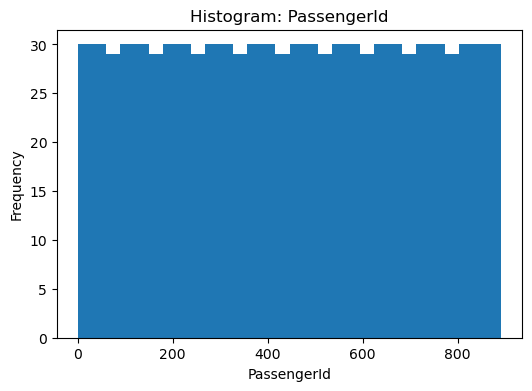

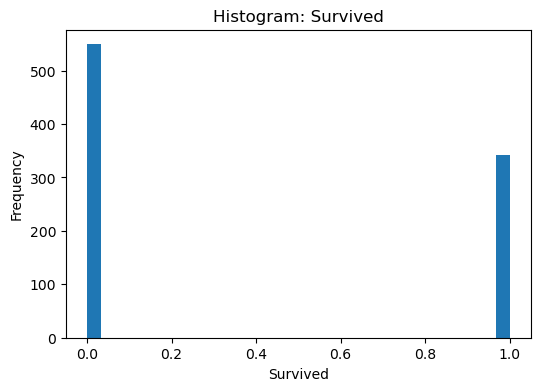

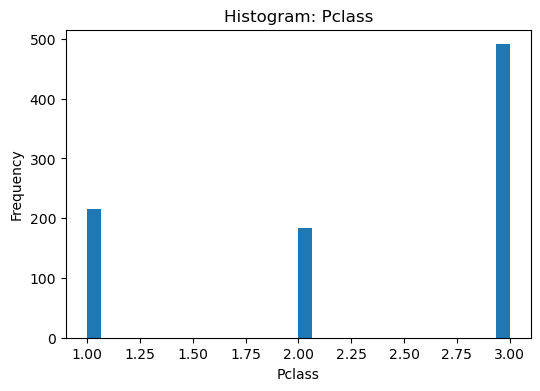

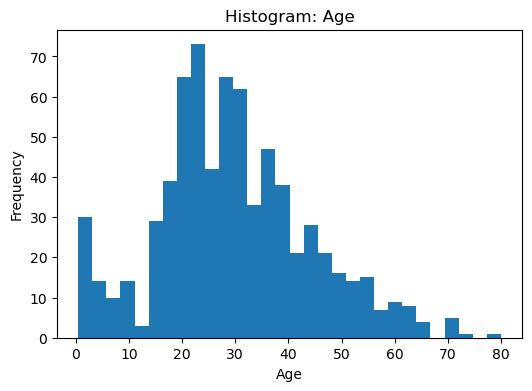

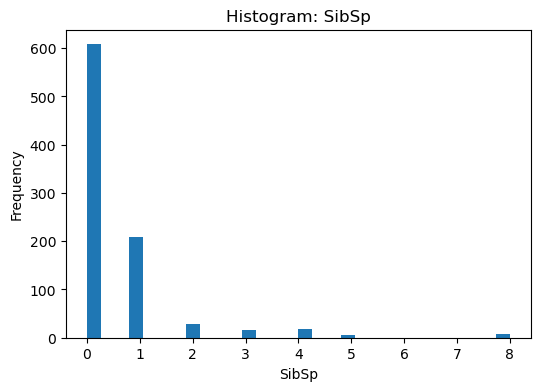

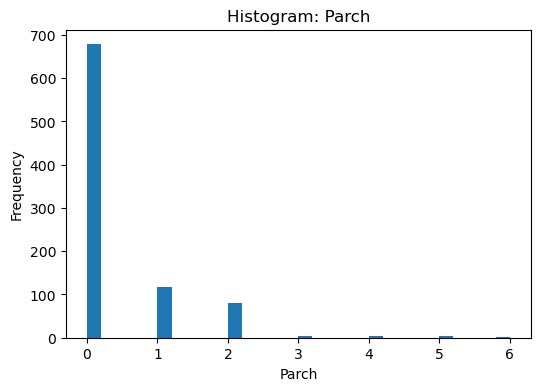

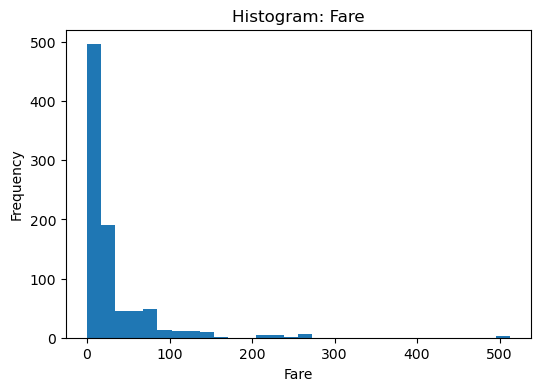

In [4]:
# Numeric histograms (first 10)
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
for col in numeric_cols[:10]:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col); plt.ylabel("Frequency")
    plt.show()

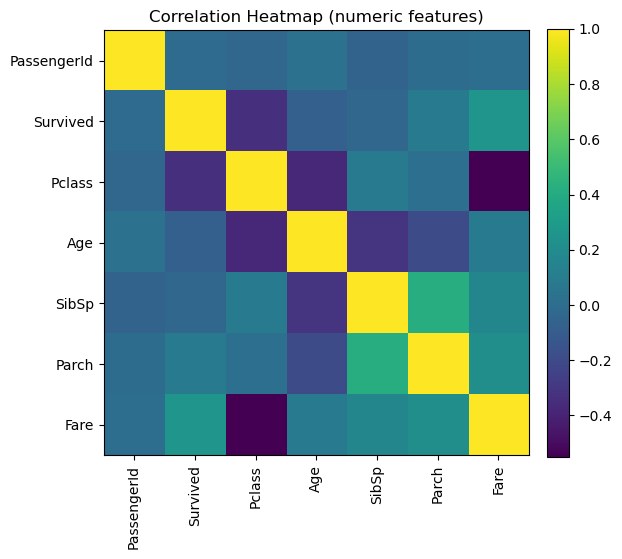

In [5]:
# Correlation heatmap (matplotlib)
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(max(6, 0.5*len(numeric_cols)), max(6, 0.5*len(numeric_cols))))
    im = plt.imshow(corr, interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title("Correlation Heatmap (numeric features)")
    plt.show()

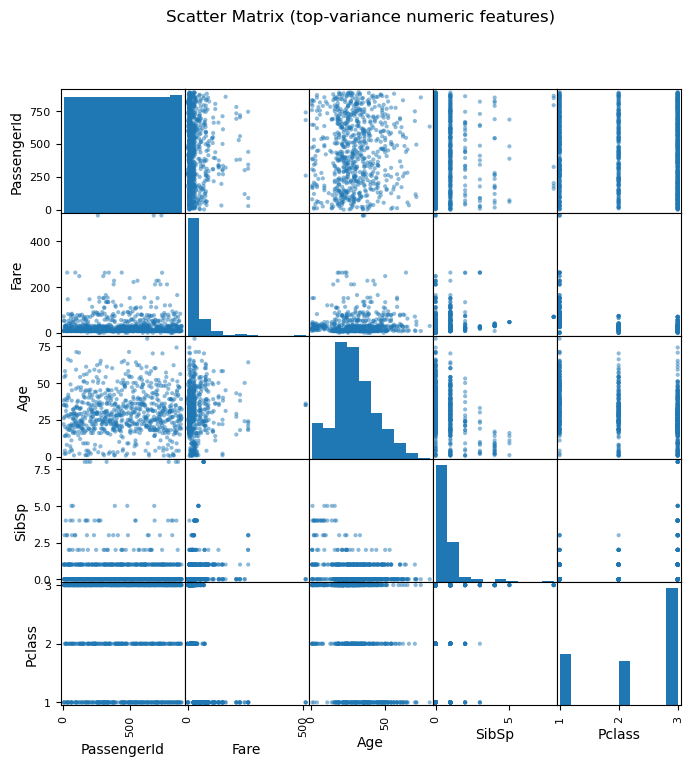

In [6]:
# Scatter matrix (top 5 by variance) 
if len(numeric_cols) >= 2:
    variances = df[numeric_cols].var().sort_values(ascending=False)
    top_for_scatter = list(variances.head(min(5, len(variances))).index)
    if len(top_for_scatter) >= 2:
        _ = scatter_matrix(df[top_for_scatter], figsize=(8,8), diagonal='hist')
        plt.suptitle("Scatter Matrix (top-variance numeric features)")
        plt.show()

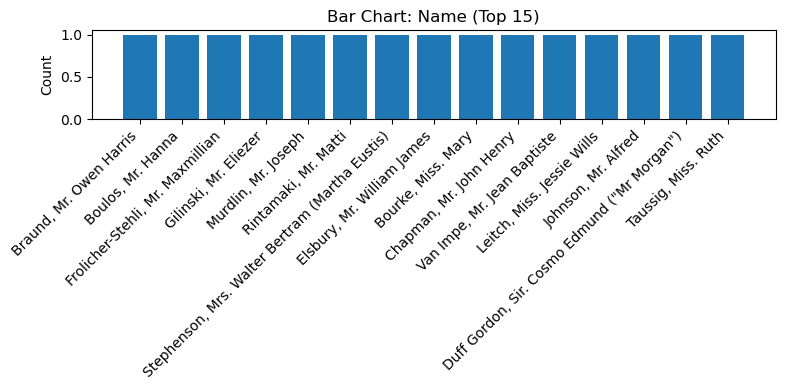

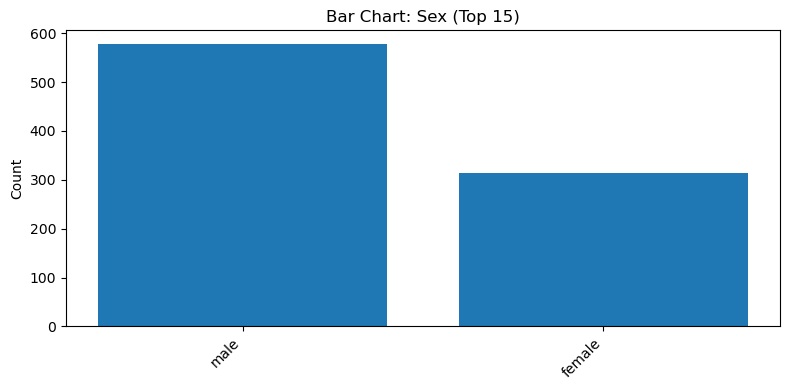

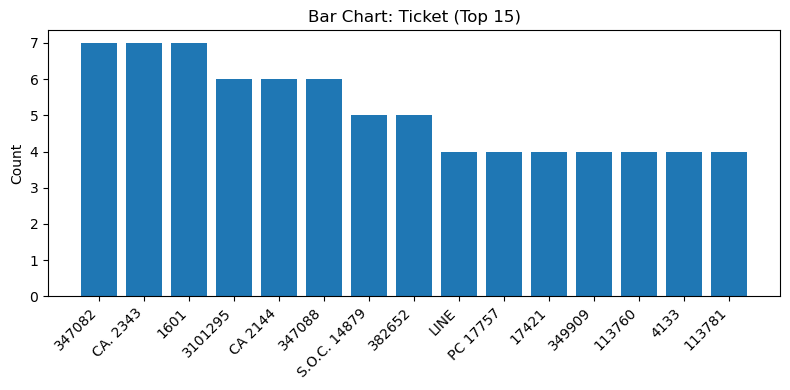

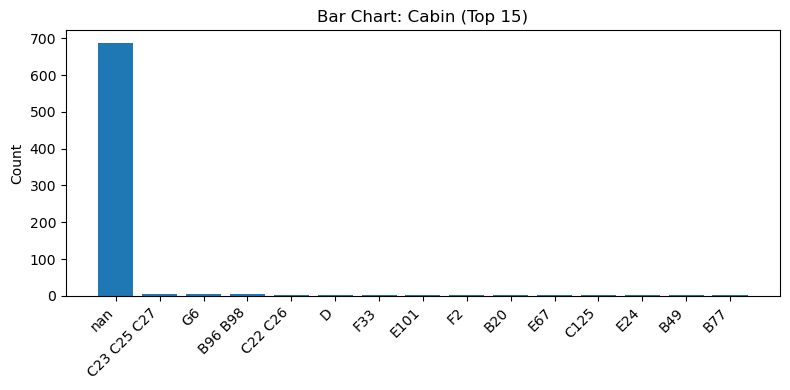

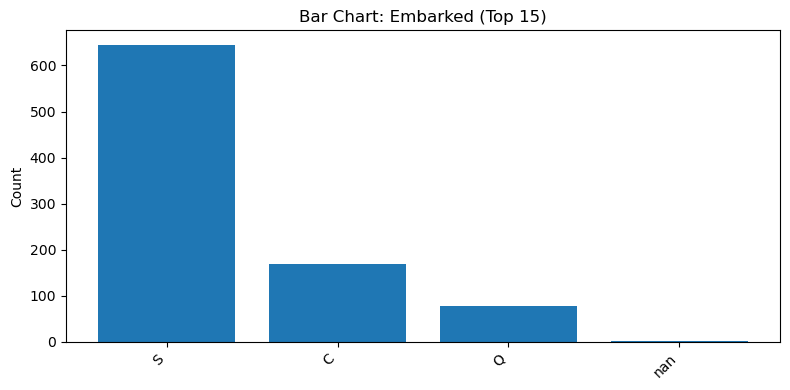

In [7]:
# Categorical bar charts (first 5)
categorical_cols = [c for c in df.columns if c not in numeric_cols]
for col in categorical_cols[:5]:
    vc = df[col].astype(str).value_counts().head(15)
    plt.figure(figsize=(8,4))
    plt.bar(vc.index.tolist(), vc.values.tolist())
    plt.title(f"Bar Chart: {col} (Top 15)")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()